#### Libraries Load

In [1]:
# import lib
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

#### Data file Load

In [2]:
# load data
bakery_df = pd.read_csv('from_nov_2018_df_combined.csv')

# print first row of data
bakery_df.head()

,Posting Date,Customer/Vendor Name,City,State,Zip Code,Warehouse Name,Group Name,Item/Service Description,Quantity,Total Sales $,Sales Employee Name
0,2018-11-01,Foragers City Grocer - Brooklyn,Brooklyn,NY,11201,New Jersey,3002_Brooklyn Indie,Unna Bake -Ginger Snap & Vanilla Dream -(6 x 7...,1,52.00,Alejandro Lopez
1,2018-11-01,Foragers City Grocer - Brooklyn,Brooklyn,NY,11201,New Jersey,3002_Brooklyn Indie,Unna Bake -Lemon Lime (6 x 7 oz),1,27.80,Alejandro Lopez
2,2018-11-01,Foragers City Grocer - Brooklyn,Brooklyn,NY,11201,New Jersey,3002_Brooklyn Indie,Unna Bake -Coconut Oat (6 x 7 oz),1,27.80,Alejandro Lopez
3,2018-11-01,Dean & Deluca - SoHo,New York,NY,10012,New Jersey,2016_Dean&Deluca,Unna Bake - Farmer's Cookie (6 x 3.4 OZ),1,20.15,House Account
4,2018-11-01,Dean & Deluca - SoHo,New York,NY,10012,New Jersey,2016_Dean&Deluca,Unna Bake -Farmer's Cookie 2 pack (12 x 1 OZ),1,20.15,House Account


In [3]:
# shape of the data
bakery_df.shape

(6912, 11)

In [4]:
# check null values
bakery_df.isnull().values.any()

False

In [5]:
# remove $ sign from total sales column
bakery_df = bakery_df.rename({'Total Sales $': 'Total Sales'}, axis=1)
bakery_df.columns

Index(['Posting Date', 'Customer/Vendor Name', 'City', 'State', 'Zip Code',
       'Warehouse Name', 'Group Name', 'Item/Service Description', 'Quantity',
       'Total Sales', 'Sales Employee Name'],
      dtype='object')

### Explorartory Data Analysis

This section we will try to find the answer of below questions. 

1. Which year has the high Sale?
2. How is the monthly sales trend for 2019 and 2020?
3. What are the top 5 and Bottom 5 items?
4. Which State has high sales?
5. Mostly sold items by cities?


In [6]:
# select necessary column
data_1 = bakery_df[['Posting Date','Total Sales']]
# convert date format to year
data_1['Year'] = pd.DatetimeIndex(data_1['Posting Date']).year
# remove posting Date column
data_1 = data_1.drop('Posting Date', 1)
# shift last column to first
cols = list(data_1.columns)
cols = [cols[-1]] + cols[:-1]
data_1 = data_1[cols]
# apply group by on year
data_1 = data_1.groupby(by="Year").sum().reset_index()
# convert year to str
data_1['Year'] = data_1.Year.astype(str)
data_1

,Year,Total Sales
0,2018,10515.77
1,2019,56527.80
2,2020,112000.54
3,2021,11580.07


#### Yearly sales analysis

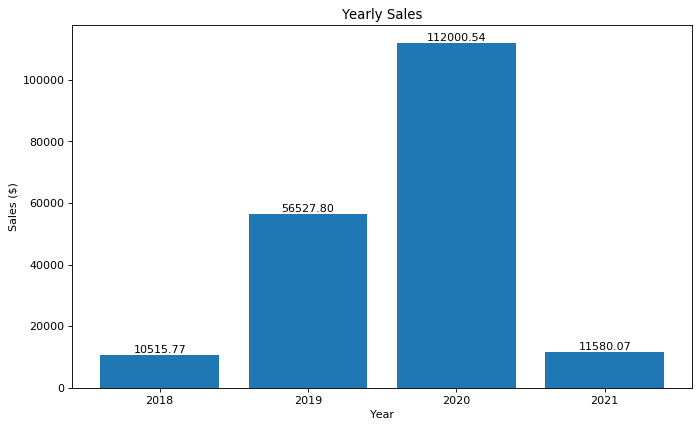

In [7]:
figure(figsize=(10, 6), dpi=80)


plt.bar(data_1['Year'], data_1['Total Sales'])
  


for x,y in zip(data_1['Year'], data_1['Total Sales']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center')

plt.xlabel("Year")
plt.ylabel("Sales ($)")
plt.title("Yearly Sales")
plt.show()

Above plot we see, we have full data for year 2019 and 2020. So below graph we will see monthly sales for these 2 years.

#### Monthly Sales Analysis

In [8]:
# Monthly Sales

# select columns
data_2 = bakery_df[['Posting Date','Total Sales']]
# create year column
data_2['Year'] = pd.DatetimeIndex(data_2['Posting Date']).year
# create Month column
data_2['Month'] = pd.DatetimeIndex(data_2['Posting Date']).strftime('%B')
# Drop Posting date column
data_2 = data_2.drop('Posting Date', 1)
# Filter by year 2019 and 2020
data_2 = data_2[(data_2['Year'] == 2019) | (data_2['Year'] == 2020)]
# reset index
data_2 = data_2.reindex(columns=['Year','Month','Total Sales'])


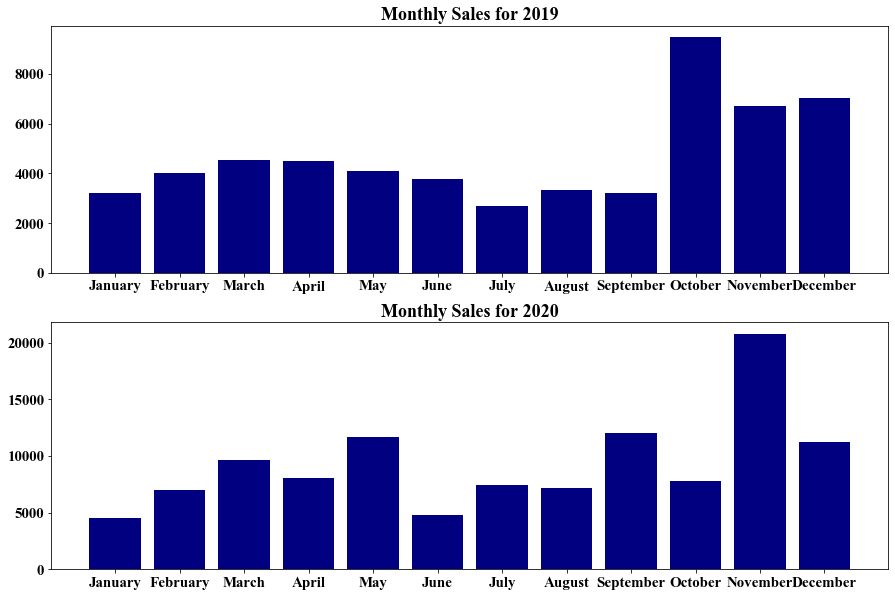

In [9]:
figure(num=None, figsize=(15, 10))

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

# data preparation for 2019
data_2019 = data_2[(data_2['Year'] == 2019)].drop('Year', 1).groupby(by="Month").sum().reset_index()

data_2019['Month'] = pd.Categorical(data_2019['Month'], 
                            ['January', 'February', 'March', 'April', 
                                         'May', 'June', 'July', 'August', 
                             'September', 'October', 'November', 'December'])
data_2019 = data_2019.sort_values('Month')

# data preparation for 2020
data_2020 = data_2[(data_2['Year'] == 2020)].drop('Year', 1).groupby(by="Month").sum().reset_index()

data_2020['Month'] = pd.Categorical(data_2020['Month'], 
                            ['January', 'February', 'March', 'April', 
                                         'May', 'June', 'July', 'August', 
                             'September', 'October', 'November', 'December'])
data_2020 = data_2020.sort_values('Month')

# Defines values for the first plot
x1 = data_2019['Month']
y1 = data_2019['Total Sales']

# Defines values for the second plot
x2 = data_2020['Month']
y2 = data_2020['Total Sales']

# Draw first subplot using plt.subplot
plt.subplot(2, 1, 1)
plt.bar(x1,y1, color='navy')
#plt.yscale('Total Sales')            
#plt.xlabel('Month')
plt.title('Monthly Sales for 2019')

# Draw second subplot using plt.subplot
plt.subplot(2, 1, 2)
plt.bar(x2,y2, color = 'navy')
#plt.yscale('Total Sales')            
#plt.xlabel('Month')
plt.title('Monthly Sales for 2020')

plt.show()

For both the years, we see a similar type of sales happening, in first-quarter sales is gradually increasing and in 3rd quarter sale is decreasing. The highest sale occurs in 4th quarter. This may be due to holidays like Halloween and Thanksgiving.

#### Top 5 items sale

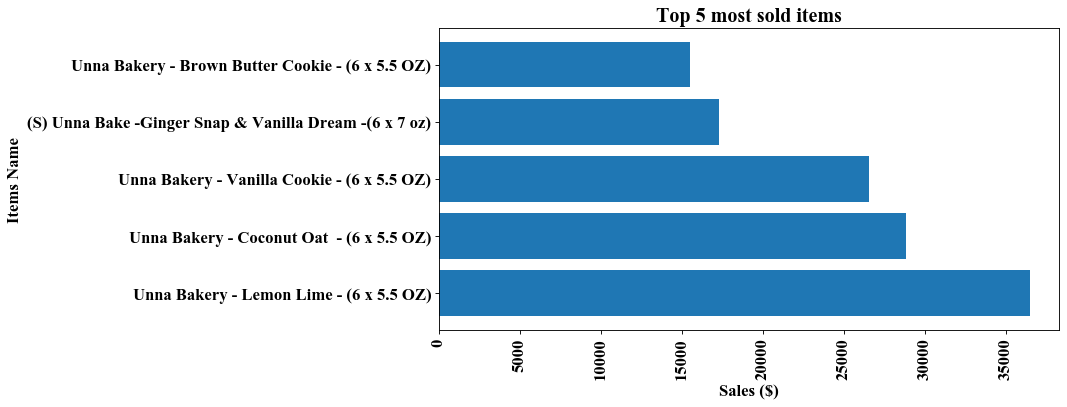

In [10]:
# top 5 items sales
data_items = bakery_df[['Item/Service Description', 'Total Sales']].groupby(by="Item/Service Description").sum().reset_index()
top5_items = data_items.sort_values(by = 'Total Sales', ascending=False).head()

figure(figsize=(10, 5), dpi=80)

plt.barh(top5_items['Item/Service Description'], top5_items['Total Sales'])
plt.xticks(rotation=90)
plt.ylabel("Items Name")
plt.xlabel("Sales ($)")
plt.title("Top 5 most sold items")
plt.show()

Lemon Lime, Coconut oat and vanilla Cookie are more popular. 

#### Bottom 5 items sale

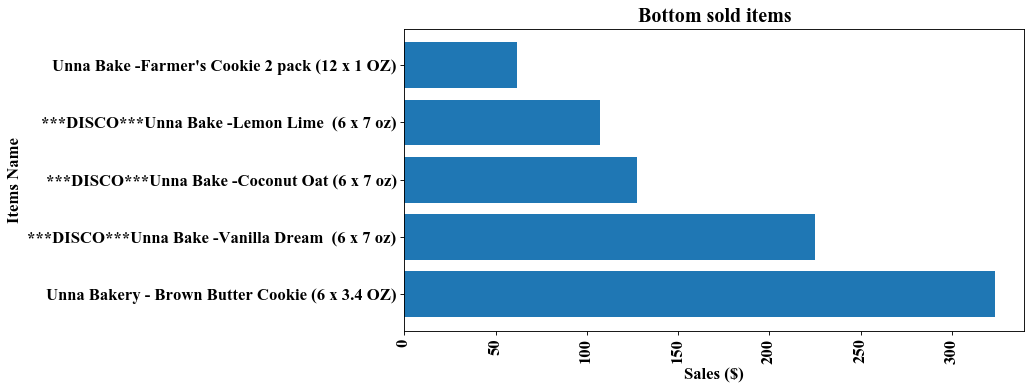

In [11]:
# top 5 items sales
bottom5_items = data_items.sort_values(by = 'Total Sales', ascending=False).tail()

figure(figsize=(10, 5), dpi=80)

plt.barh(bottom5_items['Item/Service Description'], bottom5_items['Total Sales'])
plt.xticks(rotation=90)
plt.ylabel("Items Name")
plt.xlabel("Sales ($)")
plt.title("Bottom sold items")
plt.show()

**Unna Bakery - Brown Butter Cookie (6 x 5.5 OZ)** shows in top seold items but same flavor 3.4 oz shows in bottom sold items. 

#### Sales by State

The below pie graph shows the sales distribution of cookies by different states.


In [12]:
States_sales = bakery_df[['State', 'Total Sales']].groupby(by = 'State').sum().sort_values(by = 'Total Sales', ascending=False).reset_index()

States_sales['Total Sales Rate'] = ((States_sales['Total Sales']/States_sales['Total Sales'].sum())
                              .apply('{:.0%}'.format))
States_sales

,State,Total Sales,Total Sales Rate
0,NY,132951.79,70%
1,NJ,31732.13,17%
2,CT,13894.44,7%
3,MD,4945.66,3%
4,VA,3406.25,2%
5,PA,2015.37,1%
6,DC,701.43,0%
7,KS,644.96,0%
8,DE,304.95,0%
9,WV,27.20,0%


Maximum sales happening in the New York almost 70%. 

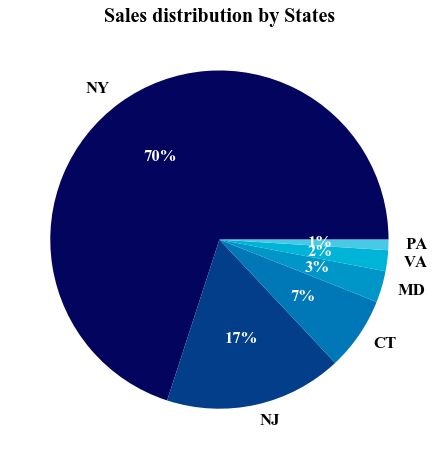

In [13]:
x = [70, 17, 7, 3, 2, 1]
labels = ['NY', 'NJ', 'CT', 'MD', 'VA', 'PA']
#colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red', 'tab:purple']
colors = ['#03045e', '#023e8a', '#0077b6', '#0096c7', '#00b4d8', '#48cae4']
figure(figsize=(15, 7), dpi=80)
_, _, autotexts = plt.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Sales distribution by States')
plt.show()

#### Top items Sales by Cities

Below shows Items sold by different cities. 

In [14]:
# top sales location
location = bakery_df[['City', 'Item/Service Description', 'Total Sales']].groupby(by=['City','Item/Service Description']).sum().reset_index().sort_values(by = 'Total Sales', ascending=False)
location.head(10)

,City,Item/Service Description,Total Sales
97,Bronx,Unna Bakery - Brown Butter Cookie - (6 x 5.5 OZ),10140.93
472,New York,Unna Bakery - Lemon Lime - (6 x 5.5 OZ),8053.29
99,Bronx,Unna Bakery - Lemon Lime - (6 x 5.5 OZ),7410.97
471,New York,Unna Bakery - Coconut Oat - (6 x 5.5 OZ),7055.17
100,Bronx,Unna Bakery - Vanilla Cookie - (6 x 5.5 OZ),6348.51
473,New York,Unna Bakery - Vanilla Cookie - (6 x 5.5 OZ),6100.13
98,Bronx,Unna Bakery - Coconut Oat - (6 x 5.5 OZ),4375.55
464,New York,Unna Bake -Ginger Snap & Vanilla Dream -(6 x 7...,3557.20
458,New York,Unna Bake - Raspberry Cave cookie (6 x 3.4 OZ),3367.54
452,New York,(S) Unna Bake -Ginger Snap & Vanilla Dream -(6...,3354.00


Most sales happen in Bronx and New York.

#### Top 5 items by Bronx

In [15]:
location[location['City']=='Bronx'].head()

,City,Item/Service Description,Total Sales
97,Bronx,Unna Bakery - Brown Butter Cookie - (6 x 5.5 OZ),10140.93
99,Bronx,Unna Bakery - Lemon Lime - (6 x 5.5 OZ),7410.97
100,Bronx,Unna Bakery - Vanilla Cookie - (6 x 5.5 OZ),6348.51
98,Bronx,Unna Bakery - Coconut Oat - (6 x 5.5 OZ),4375.55
96,Bronx,Unna Bake -Vanilla Dream Cookie (6 x 3.4 OZ),89.75


#### Top 5 items by New York

In [16]:
location[location['City']=='New York'].head()

,City,Item/Service Description,Total Sales
472,New York,Unna Bakery - Lemon Lime - (6 x 5.5 OZ),8053.29
471,New York,Unna Bakery - Coconut Oat - (6 x 5.5 OZ),7055.17
473,New York,Unna Bakery - Vanilla Cookie - (6 x 5.5 OZ),6100.13
464,New York,Unna Bake -Ginger Snap & Vanilla Dream -(6 x 7...,3557.20
458,New York,Unna Bake - Raspberry Cave cookie (6 x 3.4 OZ),3367.54


The most common cookies sold by both cities, are Lemon Lime, Vanilla, and  Coconut Oat. 

#### Sales Prediction

The dataset has 2 numerical fields i.e Quantity and Total Sales. To make the prediction on sales it will be a time series prediction. The univariate time series consists of a single observation over a time period. In our dataset, we will select the Posting date and Total Sales to predict the sales.

These are the below steps we are going to follow:

* Stationarity Check
* Plot PCF and PACF
* Model Process
* Prediction Result

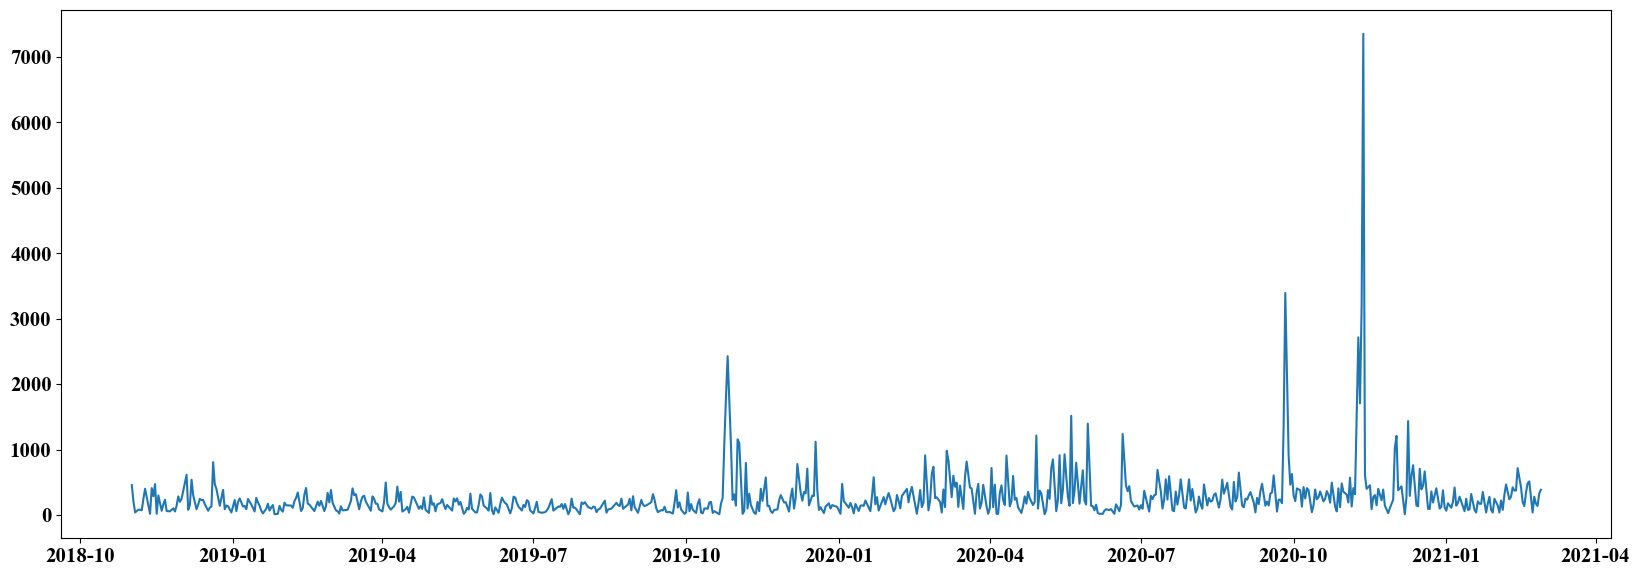

In [17]:
# select required columns 
ts_df = bakery_df[['Posting Date', 'Total Sales']].groupby(by='Posting Date').sum().reset_index()
ts_df['Posting Date'] = pd.to_datetime(ts_df['Posting Date'])
ts_df = ts_df.rename({'Posting Date': 'Date'}, axis=1)

# set date as index
ts_df.set_index('Date', inplace=True)
figure(figsize=(20, 7), dpi=100)
plt.plot(ts_df)
plt.show()

In the above graph, we see a significate hike in sales in 2020 Q4.

#### Dicky Fuller Test

Below we will use the Dicky Fuller Test to assess if the data set we have is stationary or non-stationary.

In [18]:
# Function for Dicky Fuller Test
def dicky_fuller_test(dataset, feature):

    data = dataset[feature]

    # Print Out Heading for Test
    print('Results of Dickey-Fuller Test for:', feature)

    # Set test arguments and run
    test_results = adfuller(data, autolag='AIC')

    # Extract test results
    print("1. ADF: ", test_results[0])
    print("p-value: ", test_results[1])
    print("No. of lags: ", test_results[2])
    print("No. of observation used for ADF regression and critical value calculation: ", test_results[3])
    print("Critical Value: " )

    # Loop through Critical Values (inside 4) to display and print results
    for k,v in test_results[4].items():
        print("\t", k, " : ", v)

    if test_results[1] < .05:
        print("The p-value is significant at ", test_results[1],
              ", meaning we can reject the null hypothesis in favor that the data is stationary.")
    else:
        print("The p-value is too large at ", test_results[1],
              ", meaning we cannot reject the null hypothesis and assume the data is non-stationary.")        

In [19]:
dicky_fuller_test(ts_df, 'Total Sales')

Results of Dickey-Fuller Test for: Total Sales
1. ADF:  -8.359582121810254
p-value:  2.847497549637276e-13
No. of lags:  5
No. of observation used for ADF regression and critical value calculation:  691
Critical Value: 
	 1%  :  -3.4398489271901713
	 5%  :  -2.8657317673059395
	 10%  :  -2.569002221596252
The p-value is significant at  2.847497549637276e-13 , meaning we can reject the null hypothesis in favor that the data is stationary.


#### ACF and PACF graph

ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values.PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. From both the graph we can get the parameter value p and q for ARIMA model. 

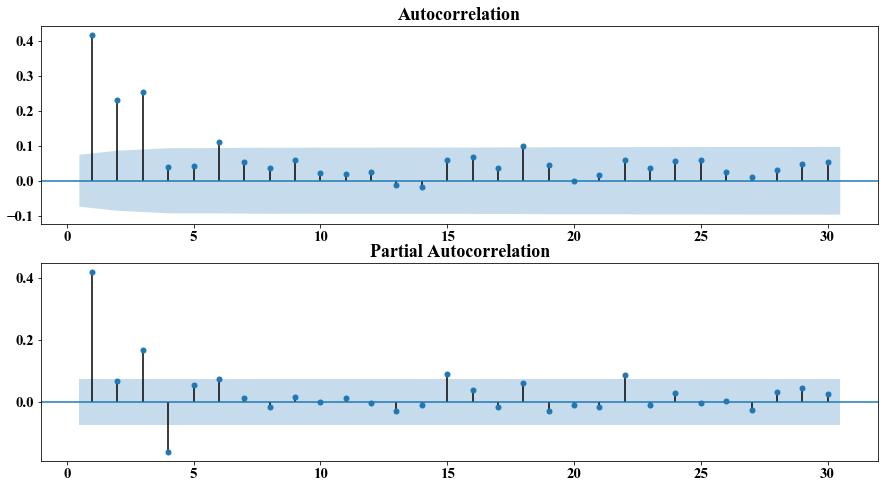

In [20]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(ts_df['Total Sales'].iloc[:],lags=30,ax=ax1, zero = False)
ax2 = fig.add_subplot(212)
fig = plot_pacf(ts_df['Total Sales'].iloc[:],lags=30,ax=ax2, zero = False)

#### Model Building 

Split the data in to train and test, and apply model. We get order from ACF and PACF plot.

In [21]:
n = 667
train_arima = ts_df.iloc[:n]
test_arima = ts_df.iloc[n:]

# check to see the dimensions of the train and test data
print('Training set dimensions: ', train_arima.shape)
print('Testing set dimensions: ', test_arima.shape)



Training set dimensions:  (667, 1)
Testing set dimensions:  (30, 1)


In [22]:
model_arima = ARIMA(train_arima['Total Sales'], order=(1,0,4))
model_arima_fit = model_arima.fit()
model_arima_fit.summary()

/Users/subhalaxmirout/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Total Sales   No. Observations:                  667
Model:                     ARMA(1, 4)   Log Likelihood               -4888.973
Method:                       css-mle   S.D. of innovations            368.893
Date:                Thu, 09 Sep 2021   AIC                           9791.946
Time:                        06:32:45   BIC                           9823.465
Sample:                             0   HQIC                          9804.157
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               274.1160     26.872     10.201      0.000     221.449     326.783
ar.L1.Total Sales    -0.9765      0.027    -36.017      0.000      -1.030      -0.923
ma.L1.Total Sales     1.3919      0.045     30.789      0.000       1.303       1.480
ma.L2.Total Sales     0.5875      0.066      8.955      0.000       0.459       0.716
ma.L3.Total Sales     0.4606      0.066      6.992      0.000       0.332       0.590
ma.L4.Total Sales     0.2833      0.037      7.684      0.000       0.211       0.356
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0240           +0.0000j            1.0240            0.5000
MA.1            0.3842           -1.5352j            1.5825           -0.2110
MA.2            0.3842           +1.5352j            1.5825            0.2110
MA.3           -1.0431           -0.0000j            1.0431           -0.5000
MA.4           -1.3514           -0.0000j            1.3514           -0.5000
-----------------------------------------------------------------------------
"""

#### Predict Model 

Predict the model using test data, and calculate accuracy measures.

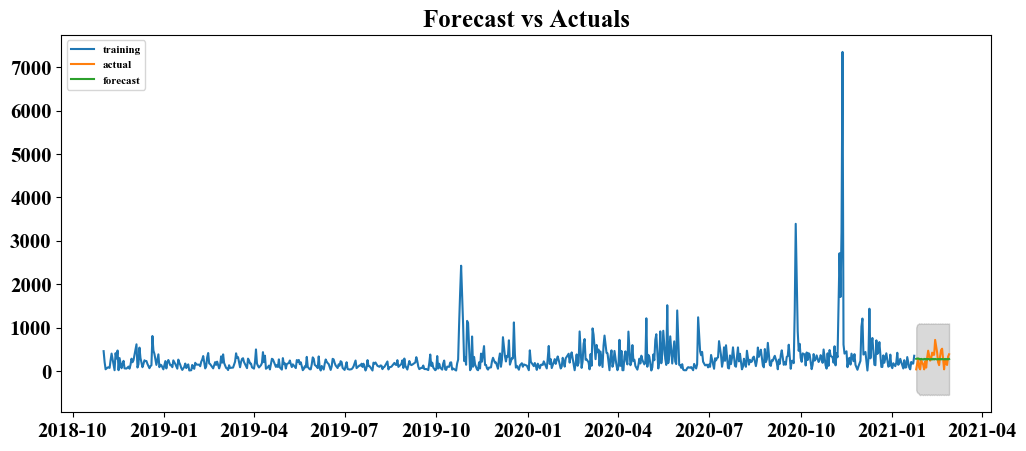

In [23]:
# Forecast
fc, se, conf = model_arima_fit.forecast(30, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_arima.index)
lower_series = pd.Series(conf[:, 0], index=test_arima.index)
upper_series = pd.Series(conf[:, 1], index=test_arima.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_arima, label='training')
plt.plot(test_arima, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Accuracy

The commonly used accuracy metrics to judge forecasts are:

* Mean Absolute Percentage Error (MAPE)
* Mean Error (ME)
* Mean Absolute Error (MAE)
* Mean Percentage Error (MPE)
* Root Mean Squared Error (RMSE)



In [24]:
def forecast_accuracy(forecast, actual):
    MAPE = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    ME = np.mean(forecast - actual)             # ME
    MAE = np.mean(np.abs(forecast - actual))    # MAE
    MPE = np.mean((forecast - actual)/actual)   # MPE
    RMSE = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'MAPE':MAPE, 'ME':ME, 'MAE': MAE, 
            'MPE': MPE, 'RMSE':RMSE,
            })


fa = forecast_accuracy(fc, test_arima['Total Sales'])

print("{:<15} {:<10}".format('Matrices','Values'))
for k, v in fa.items():
    print("{:<15} {:<10}".format(k, v))

Matrices        Values    
MAPE            1.2388111939534068
ME              8.445220545903322
MAE             133.5901354210797
MPE             0.9726565306984324
RMSE            164.04776564069036


This model does not provide the expected data, in future will try with other models such as :<br>
1. Exponential Smoothing
2. Halt's Winter Model

#### Conclusion

From above analysis we can suggest to the business/customer:<br>

1. Yearly Sale is increasing, 2020 sale is higher than 2019 sale.
2. In the month of October and November sales are high and low during the second quarter.  
3. Brown Butter Cookie is present between the top 5 and bottom 5 sold items.  The only difference is size,  5.5 oz is high demand than 7 oz packet.
4. Maximum Sale happening in New York around 70 %.  Other states like WV and DE sale is relatively low.
5. Among Cities Bronx and New York has a high sale, and Lemon Lime, Vanilla, and  Coconut Oat are the most sold items.


#### Future Work and References

If I get time later, I will perform market basket analysis using apriori algorithm. Additionally apply other models like Exponential Smoothing and Halt's Winter.

Website: https://unnabakery.com/pages/about <br>
Unna Bakery Overview: https://pitchbook.com/profiles/company/309381-67#overview